<a href="https://colab.research.google.com/github/plaban1981/Personal-ML/blob/master/Naive_Bayes_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Implementing Naive bayes using Scikit learn

#### there are three types of naive bayes in scikit learn

- Multinomial. http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

- Bernoulli. http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html

- Gaussian. http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html

https://github.com/2796gaurav/Naive-bayes-explained/blob/master/Naive%20bayes/Naive%20Bayes%20in%20scikit%20learn.ipynb

#### Diabetes files consist of four fields per record. Each field is separated by a tab and each record is separated by a newline.

File Names and format:
(1) Date in MM-DD-YYYY format
(2) Time in XX:YY format
(3) Code
(4) Value

The Code field is deciphered as follows:

- 33 = Regular insulin dose
- 34 = NPH insulin dose
- 35 = UltraLente insulin dose
- 48 = Unspecified blood glucose measurement
- 57 = Unspecified blood glucose measurement
- 58 = Pre-breakfast blood glucose measurement
- 59 = Post-breakfast blood glucose measurement
- 60 = Pre-lunch blood glucose measurement
- 61 = Post-lunch blood glucose measurement
- 62 = Pre-supper blood glucose measurement
- 63 = Post-supper blood glucose measurement
- 64 = Pre-snack blood glucose measurement
- 65 = Hypoglycemic symptoms
- 66 = Typical meal ingestion
- 67 = More-than-usual meal ingestion
- 68 = Less-than-usual meal ingestion
- 69 = Typical exercise activity
- 70 = More-than-usual exercise activity
- 71 = Less-than-usual exercise activity
- 72 = Unspecified special event

In [3]:
from google.colab import files
files.upload()

Saving pima-indians-diabetes.data.csv to pima-indians-diabetes.data.csv


{'pima-indians-diabetes.data.csv': b'6,148,72,35,0,33.6,0.627,50,1\n1,85,66,29,0,26.6,0.351,31,0\n8,183,64,0,0,23.3,0.672,32,1\n1,89,66,23,94,28.1,0.167,21,0\n0,137,40,35,168,43.1,2.288,33,1\n5,116,74,0,0,25.6,0.201,30,0\n3,78,50,32,88,31.0,0.248,26,1\n10,115,0,0,0,35.3,0.134,29,0\n2,197,70,45,543,30.5,0.158,53,1\n8,125,96,0,0,0.0,0.232,54,1\n4,110,92,0,0,37.6,0.191,30,0\n10,168,74,0,0,38.0,0.537,34,1\n10,139,80,0,0,27.1,1.441,57,0\n1,189,60,23,846,30.1,0.398,59,1\n5,166,72,19,175,25.8,0.587,51,1\n7,100,0,0,0,30.0,0.484,32,1\n0,118,84,47,230,45.8,0.551,31,1\n7,107,74,0,0,29.6,0.254,31,1\n1,103,30,38,83,43.3,0.183,33,0\n1,115,70,30,96,34.6,0.529,32,1\n3,126,88,41,235,39.3,0.704,27,0\n8,99,84,0,0,35.4,0.388,50,0\n7,196,90,0,0,39.8,0.451,41,1\n9,119,80,35,0,29.0,0.263,29,1\n11,143,94,33,146,36.6,0.254,51,1\n10,125,70,26,115,31.1,0.205,41,1\n7,147,76,0,0,39.4,0.257,43,1\n1,97,66,15,140,23.2,0.487,22,0\n13,145,82,19,110,22.2,0.245,57,0\n5,117,92,0,0,34.1,0.337,38,0\n5,109,75,26,0,36.0,0.546

## Import Libraries

In [0]:
# import dependencies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
column = ["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age","Outcome"]
df = pd.read_csv('pima-indians-diabetes.data.csv',names=column)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Visualization of the Class Label

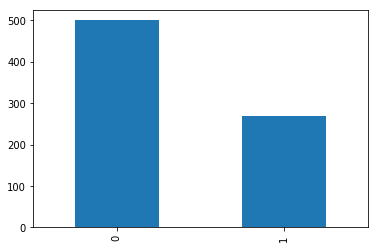

In [13]:
df.Outcome.value_counts().plot(kind='bar')

#### P(c|x) = P(x|c) * P(c) /P(x)



- P(c|x) is the posterior probability of class c given predictor ( features).
- P(c) is the probability of class.
- P(x|c) is the likelihood which is the probability of predictor given class.
- P(x) is the prior probability of predictor.

## Identify Features and Labels 

In [0]:
X = df.drop('Outcome',axis=1)
Y = df['Outcome']

## Test Train Split

In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=1)

## Applying Gaussian NaiveBayes

In [19]:
from sklearn.naive_bayes import GaussianNB
gb = GaussianNB()
gb.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

## Predictions

In [0]:
y_pred = gb.predict(X_test)
y_pred_proba = gb.predict_proba(X_test)

## Accuracy Score of the Classification Model

In [0]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [42]:
print(f'Accuracy Score of the Gaussian Naive Bayes model {np.round(accuracy_score(y_pred,y_test)*100.0,2)}%')

Accuracy Score of the Gaussian Naive Bayes model 77.27%


## Confusion Matrix

In [0]:
cm = confusion_matrix(y_pred,y_test)

In [27]:
print(cm)

[[85 21]
 [14 34]]


## Transform to df for easier plotting

In [0]:
cm_df = pd.DataFrame(cm,index=['Not Diabetic','Diabetic'],
                     columns=['Not Diabetic','Diabetic'])

In [31]:
print(cm_df)

              Not Diabetic  Diabetic
Not Diabetic            85        21
Diabetic                14        34


Text(33.0, 0.5, 'True Label')

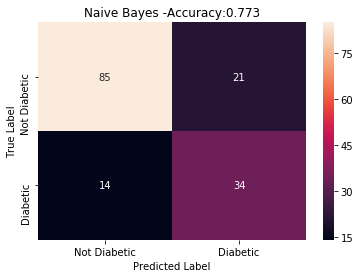

In [33]:
#pass fmt='g' to the heatmap call to keep numbers from going to scientific notation
sns.heatmap(cm_df,annot=True,fmt='g')
plt.title('Naive Bayes -Accuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

## ROC Curve


In [36]:
!pip install scikit-plot

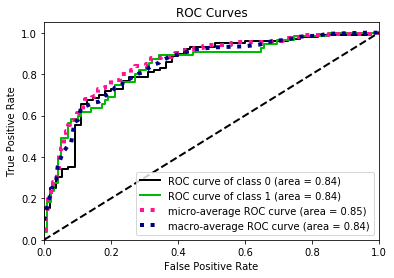

In [37]:
import scikitplot
scikitplot.metrics.plot_roc(y_test,y_pred_proba)

## Multinomial Naive Bayes

In [38]:
from sklearn.naive_bayes import MultinomialNB
mn = MultinomialNB()
mn.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [0]:
mn_y_pred = mn.predict(X_test)

In [41]:
print(f'Accuracy Score of the Multinomial Naive Bayes model {np.round(accuracy_score(mn_y_pred,y_test)*100.0,2)}%')

Accuracy Score of the Multinomial Naive Bayes model 51.3%


##Bernoulli Naive Bayes 

In [43]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(X_train,y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [0]:
bn_pred = bnb.predict(X_test)

In [45]:
print(f'Accuracy Score of the Bernoulli Naive Bayes model {np.round(accuracy_score(bn_pred,y_test)*100.0,2)}%')

Accuracy Score of the Bernoulli Naive Bayes model 61.69%
